In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [3]:
#importing the data
data=pd.read_csv(r"C:\Users\Ishan\Documents\Python Scripts\Datasets\iphone_purchase_records.csv")
data

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [8]:
#The decribe method helps getting the necessary info about the data easily
data.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [12]:
#checking if the data has any null values
data.isnull().count()

Gender             400
Age                400
Salary             400
Purchase Iphone    400
dtype: int64

In [14]:
#seperating feature columns and target column
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [5]:
X

,Gender,Age,Salary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000
...,...,...,...
395,Female,46,41000
396,Male,51,23000
397,Female,50,20000
398,Male,36,33000


In [6]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchase Iphone, Length: 400, dtype: int64

<hr>
So the data has 4 columns and 400 samples. The gender column is categorical while age and salary column are continous columns with Purchase Iphone as the target column.<br/>
We have to convert the string from gender column into numbers and we do this using the labelencoder

In [17]:
from sklearn.preprocessing import LabelEncoder
labelEncoder_gender =  LabelEncoder()
X.iloc[:,0] = labelEncoder_gender.fit_transform(X.iloc[:,0])
X

,Gender,Age,Salary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


<hr>
We have numerical data in all columns now!

In [19]:
#splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [20]:
X_train

,Gender,Age,Salary
82,1,20,49000
367,1,46,88000
179,0,31,34000
27,0,47,30000
89,1,35,50000
...,...,...,...
255,0,52,90000
72,0,20,23000
396,1,51,23000
235,1,46,79000


In [30]:
#importing libarries for preprocessing an building the model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Lets try to find best parameter value for GaussianNB

In [60]:
#make a pipeline with standard Scaler and Naive bayes model
#standardScaler gives somewhat of a gaussian ditribution to the data
gnb=Pipeline([("scaler",StandardScaler()),
              ("model",GaussianNB())
             ])

In [61]:
param_grid={"model__var_smoothing":np.arange(0.001,0.01,0.001)}

In [62]:
#gridsearching the best parameter value to achieve a high accuracy from the value range provided in param_grid above
grid=GridSearchCV(gnb,param_grid=param_grid,cv=5,scoring='accuracy', refit=True)
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', GaussianNB())]),
             param_grid={'model__var_smoothing': array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009])},
             scoring='accuracy')

In [63]:
print("Best Score: ",grid.best_score_)
print("Best Params: ",grid.best_params_)
print("Best Estimator: ",grid.best_estimator_)

Best Score:  0.89
Best Params:  {'model__var_smoothing': 0.001}
Best Estimator:  Pipeline(steps=[('scaler', StandardScaler()),
                ('model', GaussianNB(var_smoothing=0.001))])


In [64]:
grid.score(X_test,y_test)

0.87

In [65]:
y_pred=grid.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

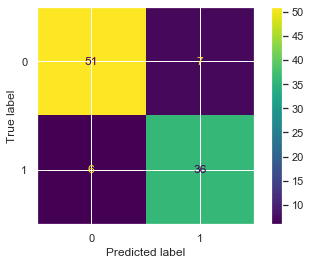

In [66]:
from sklearn import metrics
metrics.plot_confusion_matrix(grid,X_test, y_test) 


In [67]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89        58
           1       0.84      0.86      0.85        42

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.87      0.87      0.87       100

